In [1]:
import scipy as scipy
import scipy.stats as stats
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.util
import time 
import xarray as xr
import pickle 
import os

from netCDF4 import Dataset

In [2]:
#Get dimensions from a single file (same will be used for all files)
file1 = '/Users/meganfowler/gp_fuse/Flooding-physiology/Python/outflw1161.nc'
dat   = Dataset(file1)
lat   = dat.variables['lat'][:] 
lon   = dat.variables['lon'][:] 



In [4]:
fileBase = '/Users/meganfowler/gp_fuse/Flooding-physiology/RelatedCESMvariables/'

# Read in rainfall and soil liquid 
fCtrl = xr.open_dataset((fileBase + 'cesm1_0_6.1850_prei.1deg.001.clm2.MonthlyConcat_Meg.nc'),decode_times=False)
fFull = xr.open_dataset((fileBase + 'cesm1_0_6.1850_4xco2_fulgb.1deg.002.clm2.MonthlyConcat_Meg.nc'),decode_times=False)
fPhys = xr.open_dataset((fileBase + 'cesm1_0_6.1850_4xco2_fixgb.1deg.001.clm2.MonthlyConcat_Meg.nc'),decode_times=False)
fRad  = xr.open_dataset((fileBase + 'cesm1_0_6.1850_4xco2_fdbgb.1deg.002.clm2.MonthlyConcat_Meg.nc'),decode_times=False)

#CESM lat and lon
cesmLon = fCtrl.lon.values
cesmLat = fCtrl.lat.values

#Rainfall 
ctrlRain = fCtrl.RAIN         #[mm/s]
fullRain = fFull.RAIN
physRain = fPhys.RAIN
radRain  = fRad.RAIN

In [5]:
# #Read in total precipitation (liq+ice)
print('Reading in total precipitation...')
fCtrl_prect = xr.open_dataset((fileBase+'cesm1_0_6.1850_prei.1deg.001.cam2.h0.MonthlyRainAndSnow.nc'),decode_times=False) 
fFull_prect = xr.open_dataset((fileBase+'cesm1_0_6.1850_4xco2_fulgb.1deg.002.cam2.h0.MonthlyRainAndSnow.nc'),decode_times=False)
fPhys_prect = xr.open_dataset((fileBase+'cesm1_0_6.1850_4xco2_fixgb.1deg.001.cam2.h0.MonthlyRainAndSnow.nc'),decode_times=False)
fRad_prect  = xr.open_dataset((fileBase+'cesm1_0_6.1850_4xco2_fdbgb.1deg.002.cam2.h0.MonthlyRainAndSnow.nc'),decode_times=False)

print('PRECT...')
ctrlPrect = fCtrl_prect.PRECT     #[m/s]
fullPrect = fFull_prect.PRECT
physPrect = fPhys_prect.PRECT
radPrect  = fRad_prect.PRECT

print('PRECSC...')
ctrlPrecsc = fCtrl_prect.PRECSC
fullPrecsc = fFull_prect.PRECSC
physPrecsc = fPhys_prect.PRECSC
radPrecsc  = fRad_prect.PRECSC

print('PRECSL...')
ctrlPrecsl = fCtrl_prect.PRECSL
fullPrecsl = fFull_prect.PRECSL
physPrecsl = fPhys_prect.PRECSL
radPrecsl  = fRad_prect.PRECSL

ctrlPrecip = ctrlPrect+ctrlPrecsc+ctrlPrecsl
fullPrecip = fullPrect+fullPrecsc+fullPrecsl 
physPrecip = physPrect+physPrecsc+physPrecsl
radPrecip  = radPrect+radPrecsc+radPrecsl



Reading in total precipitation...
PRECT...
PRECSC...
PRECSL...


In [9]:
landMask = np.full([len(cesmLat),len(cesmLon)],np.nan)

fCtrl_lai = xr.open_dataset((fileBase+'cesm1_0_6.1850_prei.1deg.001.clm2.MonthlyTLAI.nc'),decode_times=False) 
ctrlLAI   = fCtrl_lai.TLAI

for ilon in range(len(cesmLon)):
    for ilat in range(len(cesmLat)): 
        if np.isnan(ctrlLAI[0,ilat,ilon])==True: 
        #if np.isnan(avgFullRun[ilat,ilon])==True: 
            landMask[ilat,ilon] = np.nan
        else: 
            landMask[ilat,ilon] = 1



In [7]:
#Fix for when pcolor mesh leads to data falling off the continent 
#   Code from Baird Langenbrunner
# extend longitude by 2
lon_extend = np.zeros(cesmLon.size+2)
lon_extend[1:-1] = cesmLon
lon_extend[0] = cesmLon[0]-np.diff(cesmLon)[0]
lon_extend[-1] = cesmLon[-1]+np.diff(cesmLon)[-1]
# calculate the midpoints of this extended version
lon_pcolormesh_midpoints = lon_extend[:-1]+0.5*(np.diff(lon_extend))
# extend latitude by 2
lat_extend = np.zeros(cesmLat.size+2)
lat_extend[1:-1] = cesmLat
lat_extend[0] = cesmLat[0]-np.diff(cesmLat)[0]
lat_extend[-1] = cesmLat[-1]+np.diff(cesmLat)[-1]
# calculate the midpoints of this extended version
lat_pcolormesh_midpoints = lat_extend[:-1]+0.5*(np.diff(lat_extend))

/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/Users/meganfowler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we l

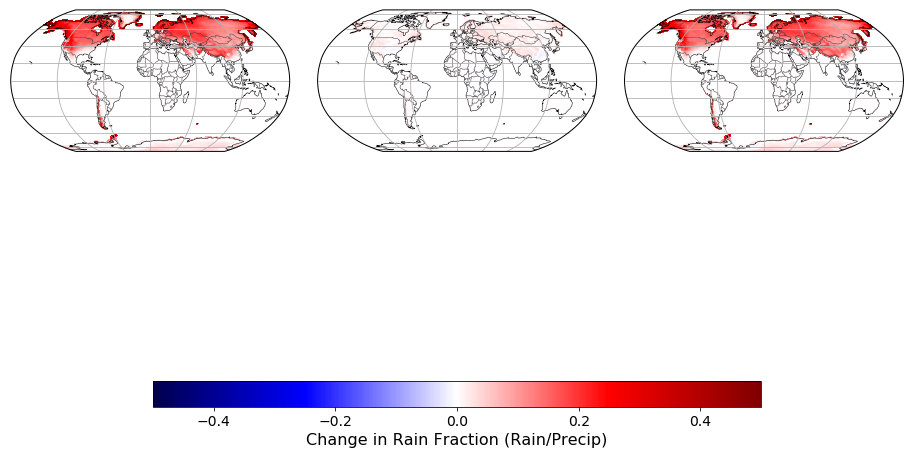

In [11]:
## --- Set up figure window --- 
fig, ax_array = plt.subplots(1,3,subplot_kw={'projection':ccrs.Robinson()})
ax1,ax2,ax3 = ax_array.flatten()
#fig.set_size_inches(11.5,8.5)
fig.set_size_inches(16,12)

# First, define the fraction in each case: 
fractionCtrl = ctrlRain.values/(ctrlPrecip.values*1000)
fractionFull = fullRain.values/(fullPrecip.values*1000)
fractionPhys = physRain.values/(physPrecip.values*1000)
fractionRad  = radRain.values/(radPrecip.values*1000)
#Eliminate places where change is +inf or -inf
fractionCtrl[np.where(np.isinf(fractionCtrl)==True)]=np.nan
fractionFull[np.where(np.isinf(fractionFull)==True)]=np.nan
fractionPhys[np.where(np.isinf(fractionPhys)==True)]=np.nan
fractionRad[np.where(np.isinf(fractionRad)==True)]=np.nan

# FULL #
ax1.set_global()
contour_plot = ax1.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,np.nanmean((fractionFull-fractionCtrl),axis=0)*landMask,cmap='seismic',vmin=-0.5,vmax=0.5,transform=ccrs.PlateCarree())
#Other figure options 
ax1.coastlines(linewidth=0.5,edgecolor='0.25')
ax1.gridlines()
ax1.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
#Add ylabel
# ax1.text(-0.07, 0.55, 'Change in Precip', va='bottom', ha='center',
#         rotation='vertical', rotation_mode='anchor',
#         transform=ax4.transAxes,fontsize=14)

# PHYS #
ax2.set_global()
contour_plot = ax2.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,np.nanmean((fractionPhys-fractionCtrl),axis=0)*landMask,cmap='seismic',vmin=-0.5,vmax=0.5,transform=ccrs.PlateCarree())
#Colorbar options 
ax_position = ax2.get_position()
cbar_ax = fig.add_axes([ax_position.x0-0.15, ax_position.y0, ax_position.width+0.3, 0.03])
cbar = plt.colorbar(contour_plot, orientation='horizontal',cax=cbar_ax)
cbar.set_label('Change in Rain Fraction (Rain/Precip)',fontsize=16)
cbar.ax.tick_params(labelsize=14)
#Other figure options 
ax2.coastlines(linewidth=0.5,edgecolor='0.25')
ax2.gridlines()
ax2.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

# RAD #
ax3.set_global()
contour_plot = ax3.pcolormesh(lon_pcolormesh_midpoints,lat_pcolormesh_midpoints,np.nanmean((fractionRad-fractionCtrl),axis=0)*landMask,cmap='seismic',vmin=-0.5,vmax=0.5,transform=ccrs.PlateCarree())
#Other figure options 
ax3.coastlines(linewidth=0.5,edgecolor='0.25')
ax3.gridlines()
ax3.add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')

fig.subplots_adjust(wspace=0.1, hspace=0.05)

fig.savefig('/Users/meganfowler/Documents/Irvine/Flooding/Physiology/Illustrator/Revisions_Round2/RainFractionChanges.pdf',bbox_inches = 'tight')

